# Casino Head Count Exploratory Data Analysis

This project focuses on the visualizations of casino head count data to provide the casino information around the popularity of each game and when to open and close specific game tables. I visually explore the data and draw three major conclusions to help the casino drive decision making.

# Dataset Description
I've listed the provided information about the values in this dataset:

GameCode: 2 digit game code:

BA: Baccarat

C4: Blackjack variant

CR: Craps

DH: Blackjack variant

FP: Four Card Poker

LI: Let it Ride

MI: Omaha Hi-Low

MQ:  Blackjack variant

MR: Mini-Baccarat

MS: Mississippi Stud

ND: Blackjack variant

PA: Pai Gow Tiles

PG: Pai Gow

RO: Roulette

RR: Electronic Roulette

S6: Big Six

SH: Blackjack variant

TH: Blackjack variant

TL: Blackjack variant

TP: Texas Hold'em Poker

UT: Ultimate Texas Hold'em

WR: Casino War

DateFormat: Date

Hour: 0-23 of the day

TabelsOcc:  Number of Tables Occupied in the casino

TablesOpen: Number of tables open in the casino. This number can be different than occupied because the pit boss can open a table and no one can be sitting at it.

Tables Closed: Number of tables closed in the casino.

HeadCount: Total Count of people at the hour, day, and table type

DayOfWeek: 1-7.  1 = Sunday, 7 = Saturday.

DayNumber 1-366:  Day of year.  Not really needed, but note that the dates start in September.


# Load Dataset

In [1]:
# Load libraries
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a variable that holds the location of the dataset
fileLoc = "~/Documents/UW Data Science Certificate/Methods for Data Analysis/Lesson 02 Assignment/JitteredHeadCount.csv"

# Load dataset as a .csv file from a local drive
casino_data = pd.read_csv(fileLoc)

# Examine dataset
The following lines of code are executed to get an idea for the shape of the dataset and the first few rows of data.

In [2]:
# Print the shape and datatypes of the dataset
print(casino_data.shape)
print(casino_data.dtypes)

# Print the first five rows of the dataset
casino_data.head()


(175677, 9)
GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object


,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


# Prepare dataset

The dataset is very long, with a thousands of rows based on timepoints of data collected at a casino for each type of game offered. There are records about the number of people playing each game (HeadCount), there are numeric values for the number of tables occupied, open, and closed for each game. The time and date columns include: Date, Hour and Day of Week. I decided to ignore DayNumber because I had the DateFormat column to work with for a Time Series.

I converted the DateFormat column to a date time format using the pandas to_datetime() function. I then set this column to be the index of the dataset. My plan was to use it in a time series plot.

The DayOfWeek column was made up of integer values that represent the different days of the week. I decoded these values to contain categorical names of the week, with 1 = "Sunday" and 7 = "Saturday".

In [3]:
# Convert DateFormat column to date time format
casino_data.loc[:, 'DateFormat'] = pd.to_datetime(casino_data.loc[:, 'DateFormat'])
casino_data.set_index('DateFormat', inplace = True) # set index on dataset


In [4]:
# Define a function to decode a numerical value to a categorical value
def Decode(x, ColumnName, Value, Name):
    Replace = x.loc[:, ColumnName] == Value
    x.loc[Replace, ColumnName] = Name
    
# Decode the integers in the Orientation column to represent the direction of the building
Decode(casino_data, "DayOfWeek", 1, "Sunday")
Decode(casino_data, "DayOfWeek", 2, "Monday")
Decode(casino_data, "DayOfWeek", 3, "Tuesday")
Decode(casino_data, "DayOfWeek", 4, "Wednesday")
Decode(casino_data, "DayOfWeek", 5, "Thursday")
Decode(casino_data, "DayOfWeek", 6, "Friday")
Decode(casino_data, "DayOfWeek", 7, "Saturday")


# Conclusion 1: The three most common games are Craps, Texas Hold 'Em Pker, and Big Six Wheel
Because there were so many timepoints for a large variety of games, I wanted to identify which games were the most common and therefore contributed to the casino's capacity the most. In the plot below, I looked at the number of tables occupied vs the head count with color represented by each game code. There were three distinct games that stood out, which also provided insight into the number of tables and subsequent head count available for each type of game.

**Conclusion 1:** The three most common games are Craps (CR), Texas Hold 'Em Poker (TM), and Big Six Wheel (S6). 

The plot below displays three distinct trends based on these three games. 

The yellow points, referring to the Craps data, show that with only 5 tables, you can accomodate up to about 80 people. This makes sense because the game Craps can be played with a large number of people around each table. 

The pink points, reffering to the Texas Hold Em data, has a more linear relationship between head count and tables occupied. However this the trend is more stepwise and less steep most likely because there typically is a limit of 5 people at each Texas Hold Em table. 

Lastly, the Big Six Wheel data (purple points), show a linear relationship between the head count and the number of tables occupied. I calculated correlation coefficient of this trend and there was a strong positive correlation between these two variables with a correlation coefficient of 0.96. The Big Six Wheel game is set up to accomodate a lot of people so this trend also makes sense.

Text(0.5, 1.0, 'Head Count vs. Number of Tables Occupied \n with Game Code by color')

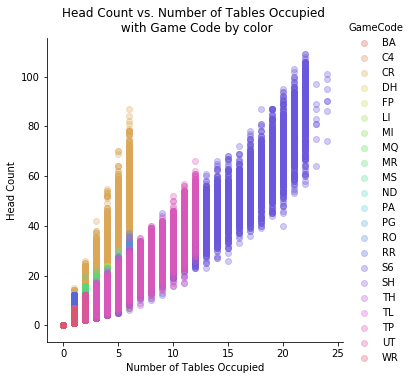

In [5]:
# Scatter Plot
sns.lmplot(x = 'TablesOcc', y = 'HeadCount', 
           data = casino_data, 
           hue = "GameCode", 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Number of Tables Occupied')
plt.ylabel('Head Count')
plt.title('Head Count vs. Number of Tables Occupied \n with Game Code by color')

For the remainder of my analysis, I chose to subset the dataset to only look at the three games that are the most common at the casino. Below I used boolean indexing to subset these data into three separate datasets pertaining to each game (Big Six Wheel, Craps, and Texas Hold Em).

In [7]:
# Subset data only pertaining to the Big Six Wheel game
s6 = (casino_data['GameCode'] == 'S6')
s6table = casino_data[s6]

# Subset data only pertaining to the Craps game
CR = (casino_data['GameCode'] == 'CR')
CRtable = casino_data[CR]

# Subset data only pertaining to the Texas Hold Em game
TP = (casino_data['GameCode'] == 'TP')
TPtable = casino_data[TP]


I decided to focus on the Big Six Wheel game. The first thing I was curious about was how the head count fluctuated over time. I used a time series plot with the date time index I created above with the DateFormat column against the head count for the Big Six Wheel game. However, as you can see below, this plot is extremely messy due to the large number of data points and does not elucidate a lot of new information. 

In [ ]:
# Time series
s6_hc = s6table[['HeadCount']]

ax = plt.figure(figsize=(30, 20)).gca() # define axis
s6_hc.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('HeadCount')
ax.set_title('Time series of Casino Head Count')

# Conclusion 2: Head count at the Big Wheel Six tables is lowest between 3am and 11am

Since the time series plot did not work out, I decided to simplify the analysis and look at what times during the day had the most head count for the Big Wheel Six game. This would be valuable information for casino owners because it can help them guage what time they will need to open up tables for the Big Wheel Six game. Below I've plotted head count against the hour during the day (0-23). 

**Conclusion 2:** Between 3am and 11am, head count is lowest at the Big Wheel Six tables.

In the plot below, the density of the hexagons around 3am and 11am show that there are typically less than 20 people playing the Big Six Wheel game. Especially around 6am, there appears to be the darkest hexagon of the plot signifying a large density of low head count at this time.

In [ ]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
s6table.plot.hexbin(x = 'Hour', y = 'HeadCount', gridsize = 10, ax = ax)
ax.set_title('Head Count vs Hour') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Hour')


# Conclusion 3: Number of people playing The Big Six Wheel game does not depend on the day of the week
After examining the head count vs hour data in the hexagon plot above, I was curious if this sort of trend held for each day of the week. Initially I would expect to see an increase in head count on Friday and Saturdays, however, there was no major difference between days in terms of head count.

**Conclusion 3:** The number of people playing The Big Six Wheel game does not depend on the day of the week.

In the faceted graphs below, I've facted the columns by the Day of the Week and graphed the head count compared to the hour of the day. Similar to the hexbin plot above, the trend holds across all days of the week.

In addition, I plotted the correlation between the tables occupied against the head count for the Big Six Wheel game. The trends appear to be the same across each day of the week, with a strong positive correlation between the tables occupied and the head count.

In [ ]:
# Faceted grid by day of the week and plotting tables occupied vs head count for the Big Six Wheel game
g = sns.FacetGrid(s6table, 
                  col='DayOfWeek',
                  palette="Set1")
g = g.map(plt.scatter, "Hour", "HeadCount") 

# Faceted grid by day of the week and plotting tables occupied vs head count for the Big Six Wheel game
g = sns.FacetGrid(s6table, 
                  col='DayOfWeek',
                  palette="Set1")
g = g.map(plt.scatter, "TablesOcc", "HeadCount") 

# Summary

From the head count casino dataset, I was able to determine the most common games that patrons play at the casino. Based on the game constraints, I was able to use a scatter plot to display how the number of tables occupied relates to head count in the context of how many players can play at each table based on the game. 

Furthermore, after honing in on The Big Six Wheel game, the head count has a meaningful trend based on the hour of the day. Between 3am and 11am, there are very few patrons playing this game so this knowledge can help provide an idea of when to open more tables for the Big Six Wheel game. Based on the hexbin plot, there do not need to be many tables open between 3am and 11am as there aren't many people playing at that time. 

Digging deeper to observe if head count at the Big Six Wheel game depends on the day of the week, the faceted plot displayed a consistent trend of head count for each hour on every day of the week, just like the hexbin plot. In addition, a positive trend in tables occupied and head count was observed on every day of the week as well. 

Overall, casino management can use these results to monitor their most popular game and when to open or close tables for the Big Six Wheel game. 